# Analysis of York Traffic Accidents: Environmental, Road, and Demographic Influences on Casualty Severity

*This paper explores traffic accident data from York City Council to identify how environmental conditions, road characteristics, and demographics influence the severity of injuries. It further explores the possibility of predicting casualty severity using machine learning models.*

## 1.0	| Introduction

**Data files can be found [here](https://github.com/Nadiazmnn/DSS-CWK.git//)**

Traffic accidents are a significant public health concern in the UK, causing numerous injuries and fatalities annually(Department for Transport, 2023a). In 2022 alone, there were 1,711 fatalities and 29,742 people seriously injured in reported road collisions across Great Britain (Department for Transport, 2023b). Understanding the factors influencing injury severity in these accidents is crucial for developing effective traffic safety policies.

This report analyses traffic accident data from York City Council to investigate how environmental conditions, road characteristics, and demographics contribute to casualty severity. By identifying these factors and their consequential influence, the study aims to provide data-driven insights for implementing targeted interventions to create a safer road environment.

Using road safety data from York City Council, this study applies a machine learning model approach, including decision trees (DT) and random forests (RF), to analyse and predict the severity of casualties in traffic accidents.



## 2.0 | Literature review

The application of machine learning techniques in traffic accident analysis has gained traction owing to its potential to enhance road safety and mitigate accident-related risks. Recent studies have delved into understanding the determinants of traffic accident severity, particularly focusing on environmental conditions, road characteristics, and demographic factors, which closely align with the objectives of analysis of York traffic accidents.

Weather conditions have been consistently identified as significant contributors to accident severity, as highlighted by Hébert et al.(2019)  and Santos et al.(2021). Factors such as rain, snow, and fog can adversely affect road conditions, thereby increasing the likelihood of accidents. This finding resonates with the exploration of York traffic accident data, where adverse weather conditions have demonstrated a role in influencing casualty severity.

Road design features, including lighting conditions and road surface conditions, have also been implicated in accident severity, as noted by Bozorg et al.(2019). Wet road surfaces resulting from rain have been associated with an elevated risk of accidents.

Demographic factors, such as the time of day and day of the week, have been shown to impact accident severity, according to Adanu et al.(2021). These findings show the importance of considering temporal factors in accident prediction models, which aligns with the approach to analyse the influence of environmental conditions, road characteristics, and demographics on casualty severity in York traffic accidents.

In many of these studies, machine learning models, including decision trees and random forests, have emerged as effective tools for predicting accident severity, as observed in the works of Cheng et al.(2022) and AlMamlook et al.(2023). These models leverage various independent variables, such as weather conditions and road surface conditions, to forecast accident severity and the number of casualties. Considering the predictive capabilities of decision trees and random forests, these techniques have been chosen for the analysis of York traffic accidents, aiming to identify which factors contribute to casualty severity.


## 3.0 | Research question

Based on the above literature review and analysis my research question is as follows:

**How do environmental conditions, road characteristics, and demographic factors influence the severity of injuries in traffic accidents, and can we predict the severity of casualties based on these factors using various machine learning models?**

## 4.0 | Presentation of data

The dataset selected for this analysis comprises of open data obtained from York City Council's records spanning from 2005 – 2019. The datasets provide information on traffic accidents, including the date, time, location, and severity of each incident. Additionally, it includes metadata detailing various factors such as environmental conditions, road characteristics, and demographic information of those involved in the accidents.
The data is divided into two parts, the accident.csv and casualties.csv. The training part consists of data from accident.csv, which contains information about the characteristics of traffic accidents, such as location, time, weather conditions, road type, and other related factors. The test set comprises data from casualties.csv, which includes details about the casualties involved in the accidents, such as their age, gender, severity of injuries, and other relevant attributes. This data provides insights into the factors contributing to traffic accidents and the resulting casualties.
The dependent variable in this analysis is the severity of injuries sustained by casualties, represented by 'Casualty_Severity.' The independent variables, or factors, include various characteristics of the accidents and casualties, such as weather conditions, road type, light conditions, speed limit, age, and gender.




## 5.0 | Methodology

### 5.1 Requirements to run the analysis

In order to conduct the analysis, we must first load the appropriate packages. Below is the code used for doing so, with comments providing a brief explanation of their roles.

In [25]:
!git clone https://github.com/Nadiazmnn/DSS-CWK.git

## Import packages to be used
# Packages for data manipulation and processing
import pandas as pd  # Pandas for data manipulation
import numpy as np  # NumPy for numerical computing

# Packages for analysis
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.tree import DecisionTreeClassifier  # DecisionTreeClassifier for classification tasks
from sklearn.ensemble import RandomForestClassifier  # RandomForestClassifier for ensemble learning
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # For model evaluation
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For data preprocessing
from sklearn.svm import SVC  # SVC (Support Vector Classifier) for classification

# Packages for visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns  # Seaborn for enhanced visualization

fatal: destination path 'DSS-CWK' already exists and is not an empty directory.


### 5.2 | Data Loading
Load data from both csv files, cleaning the column titled "Acc_Index" in the "casualties" DataFrame to "Accident_Index" for consistency. This is followed by printing the first few rows of both dataframes to understand their strucutre .


In [26]:
# Load the datasets
accidents = pd.read_csv('accidents.csv')
casualties = pd.read_csv('casualties.csv')
casualties.rename(columns={'Acc_Index': 'Accident_Index'}, inplace=True)
# Display the first few rows of each dataset to understand their structure
print(casualties.head())
print(accidents.head())

  Accident_Index  Vehicle_Reference  Casualty_Reference  Casualty_Class  \
0  200812D100026                  1                   1               1   
1    2.01112E+12                  1                   1               1   
2    2.01112E+12                  1                   1               2   
3    2.01112E+12                  1                   1               1   
4    2.01112E+12                  1                   1               1   

   Sex_of_Casualty  Age_of_Casualty  Age_Band_of_Casualty  Casualty_Severity  \
0                1               17                     4                  3   
1                1               20                     4                  3   
2                2               24                     5                  3   
3                1               26                     6                  3   
4                2               26                     6                  3   

   Pedestrian_Location  Pedestrian_Movement  Car_Passenger  \
0     

### 5.3 | Data cleaning and Preprocessing

The below code merges two datasets, 'accidents' and 'casualties', based on a common column 'Accident_Index', using an inner join method. The resulting dataset, 'combined_data', contains information from both datasets combined into a single DataFrame. The .head() method is then used to display the first few rows of the merged dataset for inspection. This step ensures that relevant information from both datasets has been combined correctly for further analysis.


In [ ]:
# Merging datasets on 'Accident_Index'
combined_data = pd.merge(accidents, casualties, on='Accident_Index', how='inner')
print(combined_data.head())


  Accident_Index  Location_Easting_OSGR   Location_Northing_OSGR  Longitude  \
0  200812D100026                460830.0                452510.0  -1.074261   
1    2.00912E+12                460220.0                446720.0  -1.084698   
2    2.00912E+12                460220.0                446720.0  -1.084698   
3    2.00912E+12                460220.0                446720.0  -1.084698   
4    2.00912E+12                460220.0                446720.0  -1.084698   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  53.965099            12                  3                   1   
1  53.913137            12                  3                   1   
2  53.913137            12                  3                   1   
3  53.913137            12                  3                   1   
4  53.913137            12                  3                   1   

   Number_of_Casualties        Date  ...  Age_Band_of_Casualty  \
0                     1  10/01/2008  ...    

Missing values are then removed by first dropping rows with any missing values and then filling in missing numerical data with the median value. This ensures that the dataset is free from missing values, enabling accurate analysis. The 'Date' column is converted to the datetime format to facilitate temporal analysis and ensure uniformity in date representation across the dataset.

In [ ]:
# Data Cleaning
# First Check for missing values
print(combined_data.isnull().sum())

# Next I handle missing values by imputation or removal
combined_data.dropna(inplace=True)

# Check and convert data types to format dd/mm/YYYY
combined_data['Date'] = pd.to_datetime(combined_data['Date'],  format='%d/%m/%Y')
# Filling missing values for numerical data
for col in combined_data.select_dtypes(include=np.number).columns:
    combined_data[col].fillna(combined_data[col].median(), inplace=True)

Accident_Index                                       0
Location_Easting_OSGR                              471
Location_Northing_OSGR                             471
Longitude                                          471
Latitude                                           471
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                                 0
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

## 6.0 | Results and Discussion

The next step conducts descriptive analysis and visualisation of the dataset, focusing on accident severity, correlations between numeric features, and relationships between casualty severity and other variables.


In [27]:
# Descriptive statistics
print(combined_data.describe())
numeric_data = combined_data.select_dtypes(include=[np.number])

       Location_Easting_OSGR   Location_Northing_OSGR      Longitude  \
count           898991.000000           898991.000000  898991.000000   
mean            460344.863957           452343.068676      -1.081238   
min             451738.000000           443248.000000      -1.212910   
25%             458739.000000           451241.000000      -1.106007   
50%             460311.000000           451945.000000      -1.081589   
75%             461615.000000           453558.000000      -1.061680   
max             470395.000000           462361.000000      -0.928845   
std               2613.589511             2647.635696       0.039936   

            Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  898991.000000      898991.0      898991.000000       898991.000000   
mean       53.963597          12.0           2.866210            1.845391   
min        53.881412          12.0           1.000000            1.000000   
25%        53.953629          12.0         

Count plot to visualize the distribution of accident severity levels:

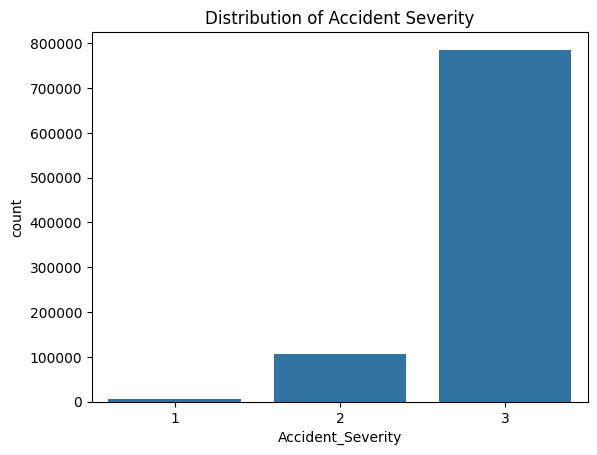

In [28]:
# Accident severity distribution
sns.countplot(x='Accident_Severity', data=combined_data)
plt.title('Distribution of Accident Severity')
plt.show()

Where an Accident_Severity of:

1	=  Fatal

2 =  Serious

3	=  Slight


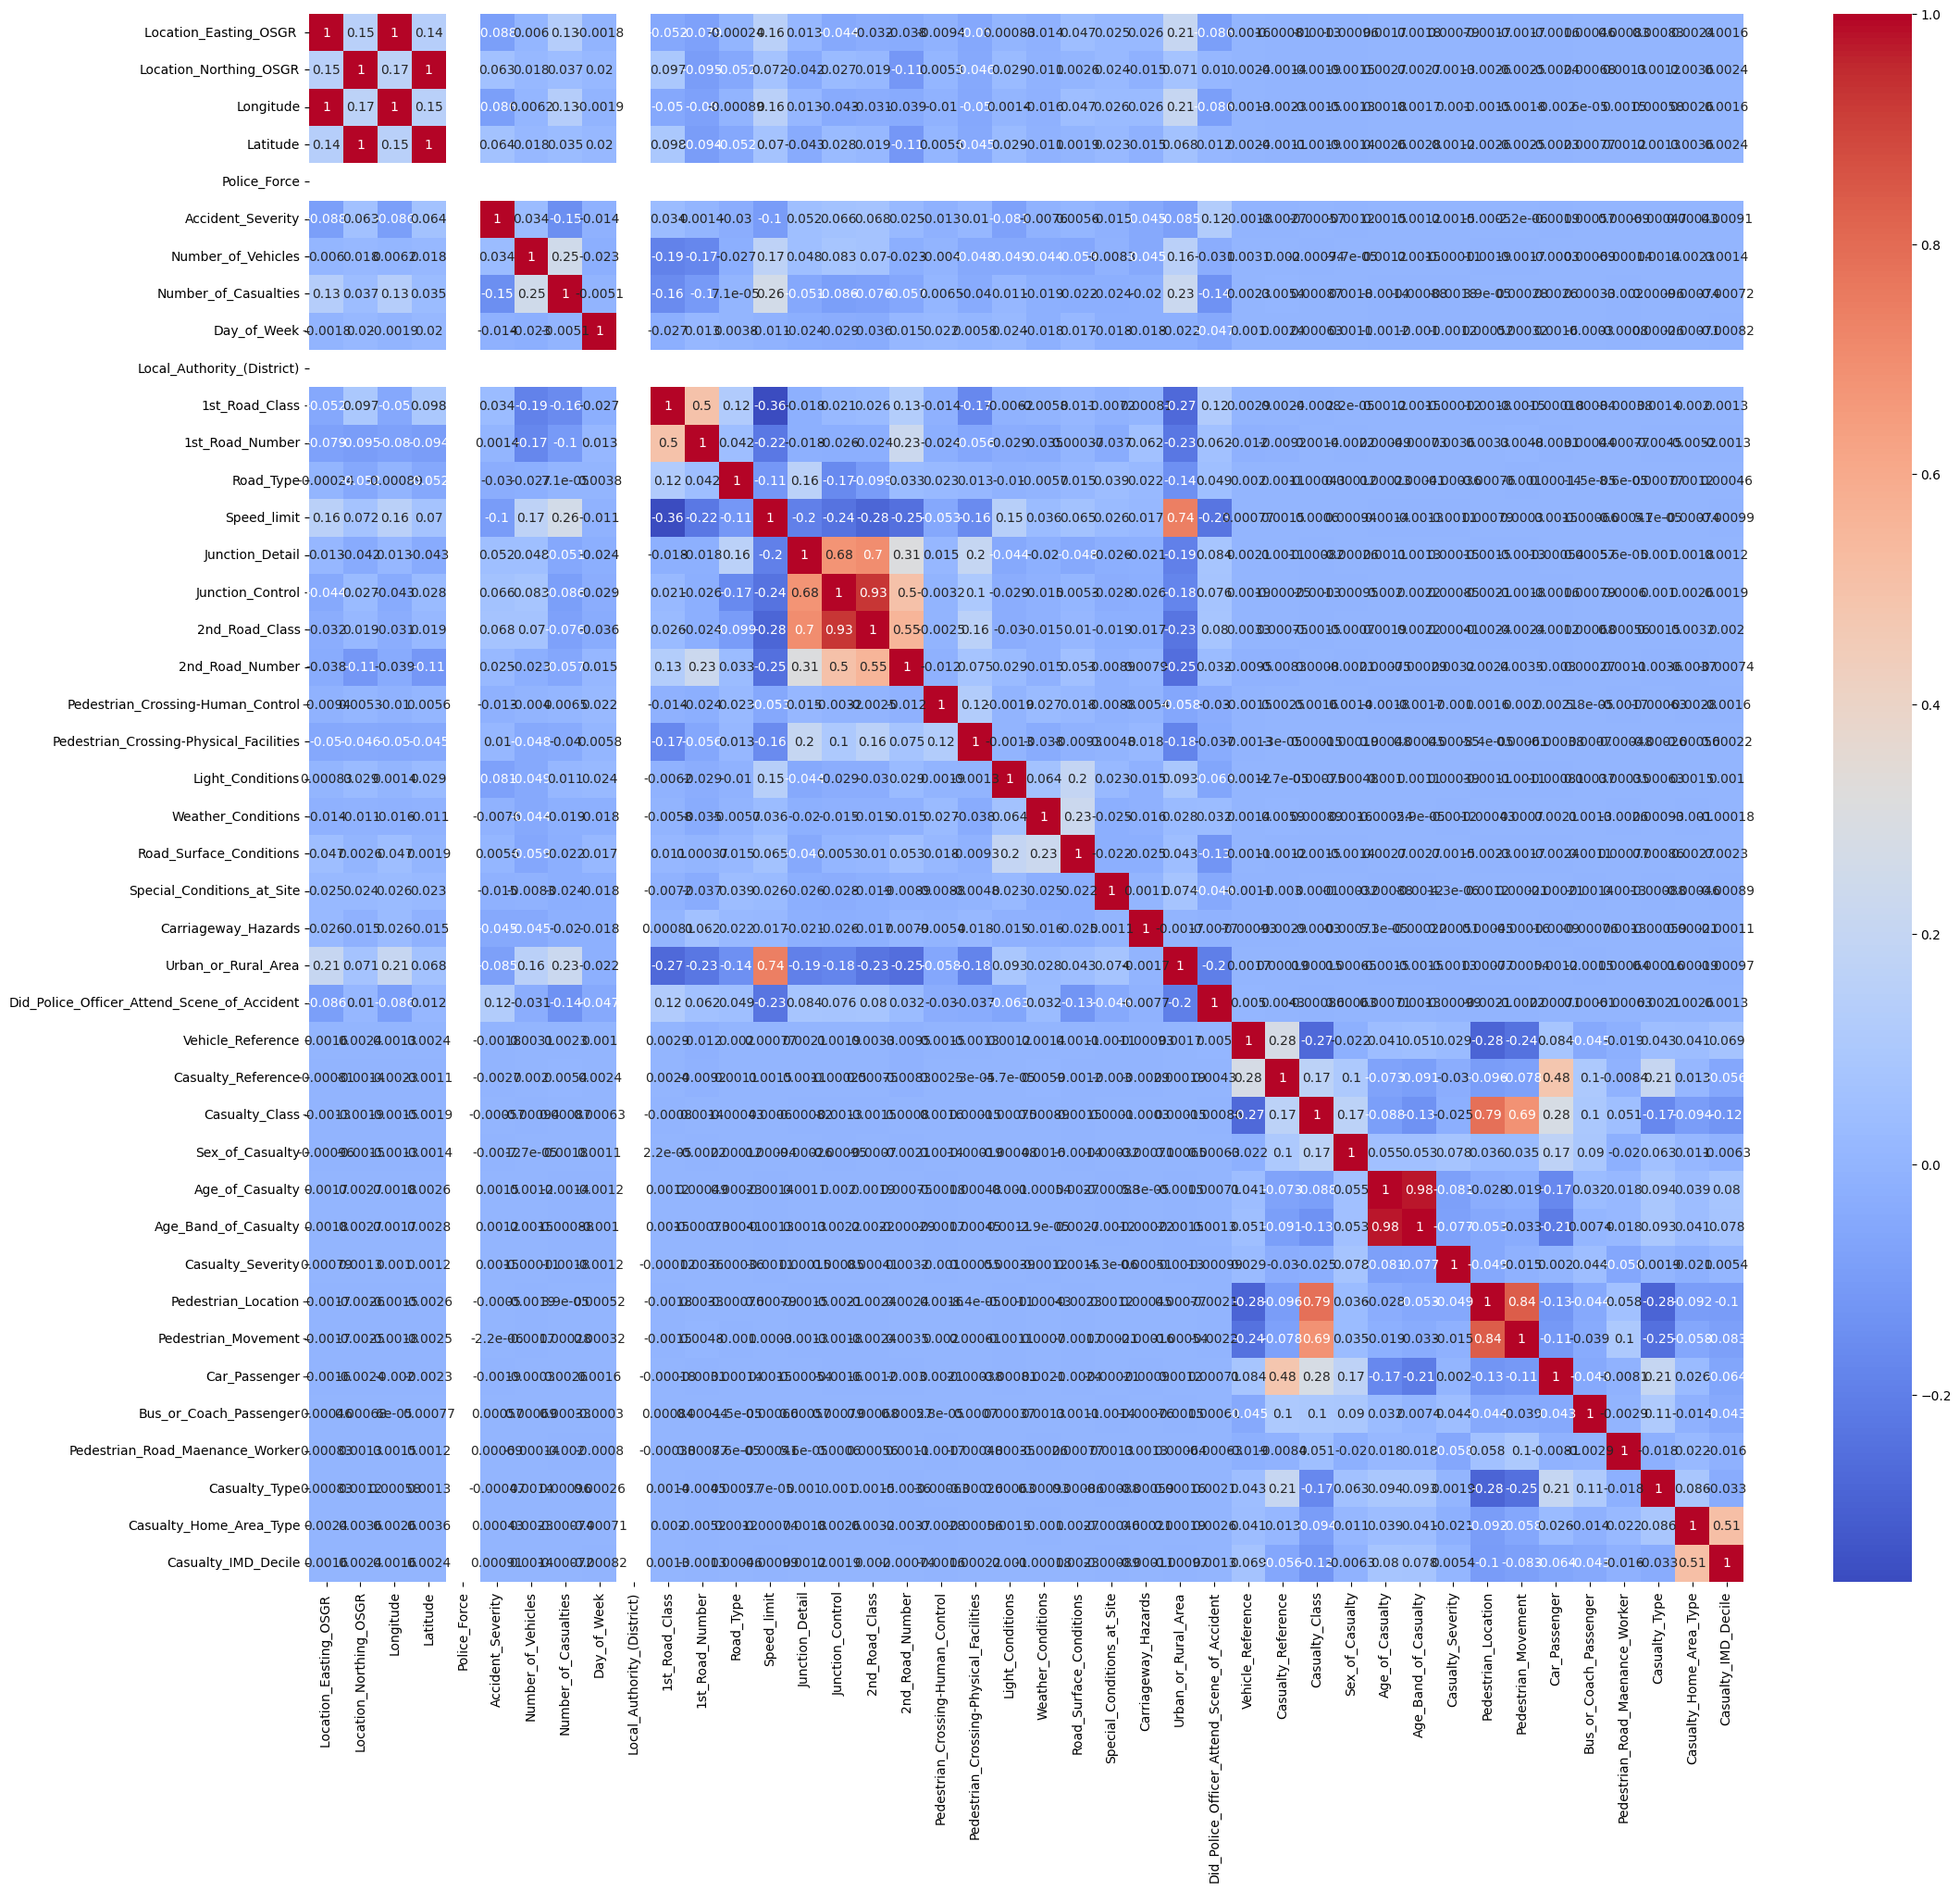

In [29]:
# Correlation heatmap
plt.figure(figsize=(25, 22))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In the correlation heatmap, a correlation coefficient of 0.75 between 'speed_limit' and 'urban_or_rural_area' indicates a strong positive correlation. This implies that there is a significant relationship between the speed limit and whether the accident occurred in an urban or rural area.


Additionally there was a correlation coefficient of 0.79 between 'pedestrian_location' and 'casualty_class' suggesting a strong positive correlation. This indicates that there is a notable relationship between the location of the pedestrian at the time of the accident and the class of the casualty involved.

**Casuality Severity by Weather Condition**

A bar plot is used to explore the relationship between casualty severity and weather conditions. This visualization helps assess how different weather conditions may influence the severity of accidents, providing insights into environmental factors affecting accident outcomes

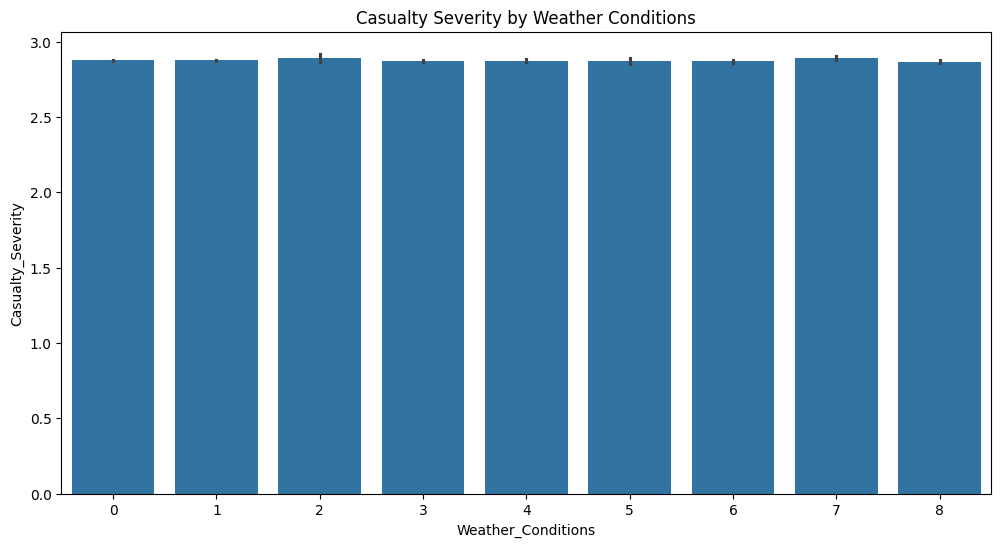

In [30]:
# Casualty severity by weather conditions
plt.figure(figsize=(12, 6))
sns.barplot(x='Weather_Conditions', y='Casualty_Severity', data=combined_data)
plt.title('Casualty Severity by Weather Conditions')
plt.show()

The boxplot indicates a higher concentration of data points for weather conditions 3 (Snowing no high winds) and 6 (Snowing + high winds). The line extending from the top of each bar represents the highest data points or outliers within the data distribution

Weather conditions are categorized as follows:

1: Fine weather without high winds

2: Raining without high winds

3: Snowing without high winds

4: Fine weather with high winds

5: Raining with high winds

6: Snowing with high winds

7: Fog or mist

8: Other conditions

9: Unknown conditions








**Casualty Severity by age and sex**

A bar plot is created to analyse casualty severity concerning age and sex. This visualization allows for the examination of demographic trends or disparities in accident outcomes based on age and gender.

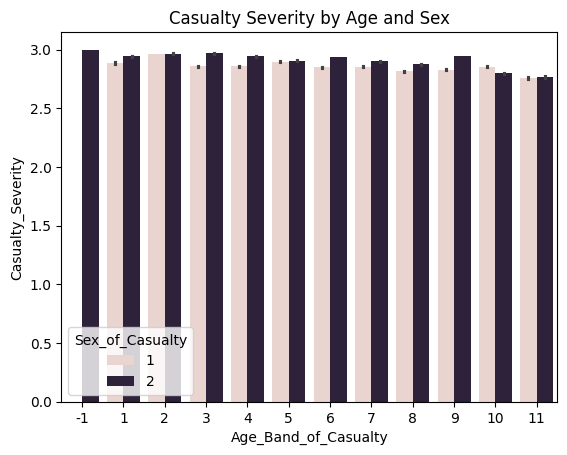

In [31]:
# Casualty severity by age and sex
sns.barplot(x='Age_Band_of_Casualty', y='Casualty_Severity', hue='Sex_of_Casualty', data=combined_data)
plt.title('Casualty Severity by Age and Sex')
plt.show()

 For age band 1, males exhibit a higher severity rate compared to females. Conversely, in the second age group, both sexes display similar casualty rates. Bands 3, 4, 7, 8, and 9 demonstrate a consistent distribution pattern. However, in band 10, the severity of casualties is more pronounced among females than males.


**Sex of Casualty:**

Label 1: Male

Label 2: Female

**Age Band of Casualty:**:

-1: Data missing

1: 0-5 years

2: 6-10 years

3: 11-15 years

4: 16-20 years

5: 21-35 years

6: 26-30 years

7: 36-40 years

8: 46-55 years

9: 56-65 years

10: 66-75 years

11: Over 75 years

**Label Encoder**

The code utilizes label encoding to convert categorical data into a numerical format, enabling easier processing for modeling. It also selects key features ('Weather_Conditions', 'Road_Type', 'Light_Conditions', 'Speed_limit') and identifies the target variable ('Casualty_Severity') for prediction tasks.

In [ ]:
# Label encoding for categorical variables
le = LabelEncoder()
for col in ['Weather_Conditions', 'Road_Type', 'Light_Conditions']:
    combined_data[col] = le.fit_transform(combined_data[col])

# Selecting features and target for machine learning
X = combined_data[['Weather_Conditions', 'Road_Type', 'Light_Conditions', 'Speed_limit']]
y = combined_data['Casualty_Severity']


**Supervised learning techniques**

The below section implements supervised learning techniques to predict casualty severity by splitting the data into training and test sets. Trained classifiers were created for prediction. Evaluation was conducted using accuracy metrics, classification reports, and confusion matrices.

In [ ]:
# Feature Engineering
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=32)
dt_classifier.fit(X_train, y_train)

# Making predictions
#predictions = dt_classifier.predict(X_test)

# Evaluating the model
#print(confusion_matrix(y_test, predictions))
#print(classification_report(y_test, predictions))
dt_predictions = dt_classifier.predict(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=60, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
# Evaluating the models
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))


Decision Tree Accuracy: 0.880547872064309
Random Forest Accuracy: 0.880547872064309


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif


Decision Tree Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1858
           2       0.00      0.00      0.00     30358
           3       0.88      1.00      0.94    237482

    accuracy                           0.88    269698
   macro avg       0.29      0.33      0.31    269698
weighted avg       0.78      0.88      0.82    269698



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1858
           2       0.00      0.00      0.00     30358
           3       0.88      1.00      0.94    237482

    accuracy                           0.88    269698
   macro avg       0.29      0.33      0.31    269698
weighted avg       0.78      0.88      0.82    269698


Decision Tree Confusion Matrix:
 [[     0      0   1858]
 [     0      0  30358]
 [     0      0 237482]]

Random Forest Confusion Matrix:
 [[     0      0   1858]
 [     0      0  30358]
 [     0      0 237482]]


The dataset exhibits a skewed distribution, with more instances of slight injuries than fatal ones. Consequently, the ML model is better at detecting slight injuries due to the higher count in comparison to fatal injuries. This model can aid in predicting when severity will not be severe or fatal, facilitating resource allocation for mitigating circumstances.

# Conclusion

This analysis aimed to develop a predictive model for casualty severity based on environmental conditions, road characteristics, and demographics using traffic accident data from York City Council.

Key factors influencing casualty severity were identified. A strong positive correlation between speed limits and urban areas suggests a link between speed limits and accident locations. Similarly, a strong positive correlation between pedestrian location and casualty class indicates a connection between where pedestrians are struck and the seriousness of their injuries. Notably, a higher concentration of accidents occurred during snow, highlighting risks associated with snowy weather, consistent with previous research by Hébert et al. (2019) and Santos et al. (2021).

These findings offer insights for targeted interventions. For example, during snowfall, additional snow removal teams could be deployed, or public advisories on safe driving practices issued.

Furthermore, machine learning models, particularly decision trees and random forests, demonstrated effectiveness in predicting accident severity, achieving an accuracy of 88.05% on test data, aligning with findings from Cheng et al. (2022) and AlMamlook et al. (2023).

Examining casualty severity by age and sex revealed disparities across different groups.

Further research could investigate the reasons behind the correlation between speed limits and urban/rural areas, considering road types and traffic volume. Additionally, exploring factors such as pedestrian visibility and specific pedestrian locations (e.g., crosswalks, intersections) may reveal further patterns.

Continued research and exploration of these factors can inform more effective traffic safety policies, ultimately reducing road fatalities and creating a safer environment for all.